In [150]:

#sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc, roc_curve, classification_report, roc_auc_score
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize


In [151]:
#load package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt
import seaborn as sns
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [152]:
#test and train dataset split

df = pd.read_csv('Feature/feature_tt.csv')
df['split'] = np.random.randn(df.shape[0], 1)

msk = np.random.rand(len(df)) <= 0.7

train = df[msk]
test = df[~msk]

In [153]:
#correlation map
#f,ax = plt.subplots(figsize=(18, 18))
#sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [154]:
x = train.drop("Level", axis=1)
y = train["Level"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.25,random_state=1)


In [155]:
def eval_fun(labels, preds):
    labels = labels.split(' ')
    preds = preds.split(' ')
    rr = (np.intersect1d(labels, preds))
    precision = np.float(len(rr)) / len(preds)
    recall = np.float(len(rr)) / len(labels)
    try:
        f1 = 2 * precision * recall / (precision + recall)
    except ZeroDivisionError:
        return (precision, recall, 0.0)
    return (precision, recall, f1)

In [156]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model. RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
   #tree.ExtraTreeClassifier(),
    
    xgb.XGBClassifier(),
    
    ]

In [157]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    
    
    predicted = alg.fit(x_train, y_train).predict(x_test)
    #fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(x_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(x_test, y_test), 4)
    #MLA_compare.loc[row_index, 'MLA Precission'] = precision_score(y_test, predicted)
    #MLA_compare.loc[row_index, 'MLA Recall'] = recall_score(y_test, predicted)
    #MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)
    



    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

,MLA Name,MLA Train Accuracy,MLA Test Accuracy
18,XGBClassifier,1.0000,0.7667
17,DecisionTreeClassifier,1.0000,0.7333
2,ExtraTreesClassifier,1.0000,0.7333
3,GradientBoostingClassifier,1.0000,0.7333
9,SGDClassifier,0.6966,0.7000
4,RandomForestClassifier,0.9775,0.7000
7,PassiveAggressiveClassifier,0.7753,0.6000
16,LinearSVC,0.6854,0.6000
1,BaggingClassifier,0.9775,0.5667
10,Perceptron,0.6180,0.5333


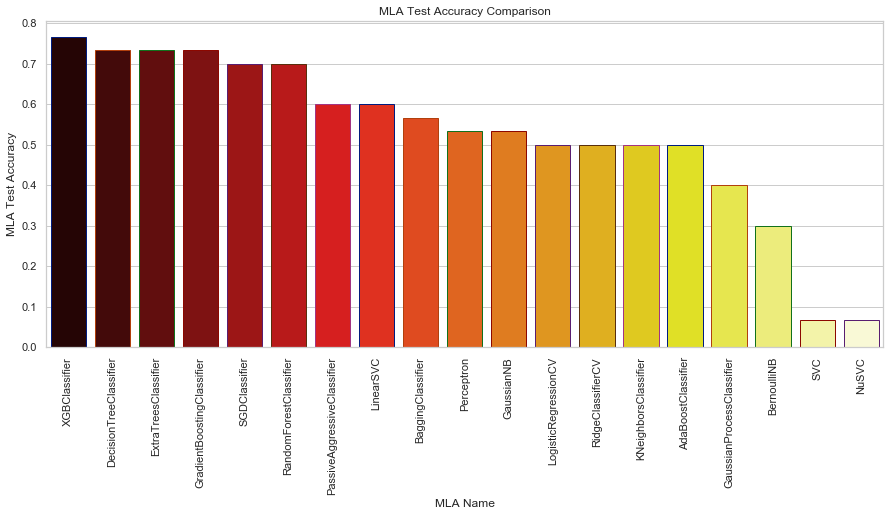

In [158]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Test Accuracy Comparison')
plt.show()

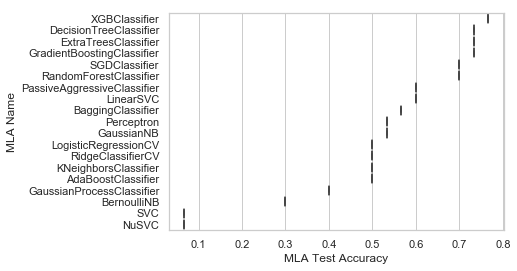

In [159]:
sns.set(style="whitegrid")
sns.boxplot(y="MLA Name", x="MLA Test Accuracy",data=MLA_compare)

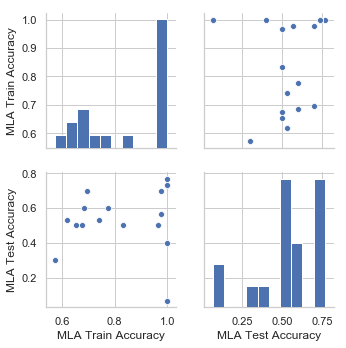

In [160]:
sns.set(style="whitegrid")
sns.pairplot(data=MLA_compare)

In [161]:
classification_report(y_test, predicted)

'              precision    recall  f1-score   support\n\n           1       0.25      0.50      0.33         2\n           2       0.70      0.88      0.78         8\n           3       1.00      0.88      0.93         8\n           4       0.89      0.67      0.76        12\n\n    accuracy                           0.77        30\n   macro avg       0.71      0.73      0.70        30\nweighted avg       0.83      0.77      0.78        30\n'

In [162]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [163]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

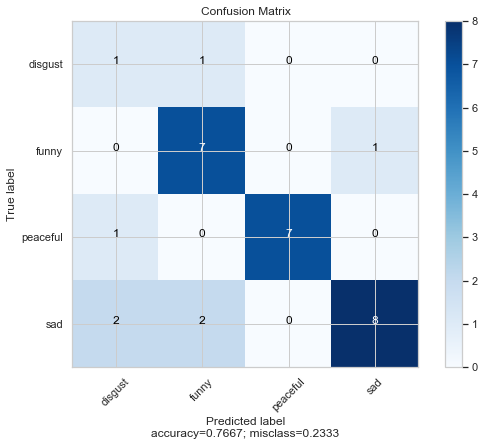

In [164]:
#not normalized
plot_confusion_matrix(cm           = confusion_matrix(y_test, predicted),
                      normalize    = False,
                      target_names = ['disgust', 'funny', 'peaceful', 'sad'],
                      title        = "Confusion Matrix")

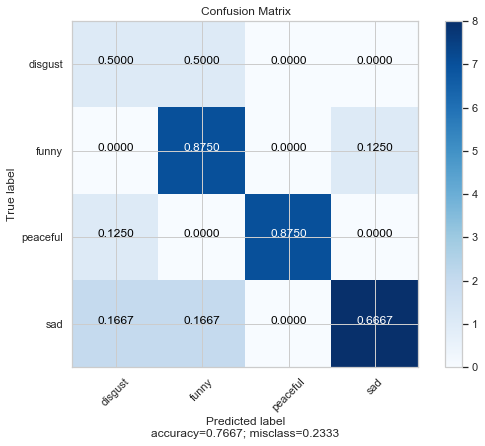

In [165]:
#normalized
plot_confusion_matrix(cm           = confusion_matrix(y_test, predicted),
                      normalize    = True,
                      target_names = ['disgust', 'funny', 'peaceful', 'sad'],
                      title        = "Confusion Matrix")